Credit to https://www.kaggle.com/nlothian/fake-news-nlp-stuff

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS

matplotlib.style.use('ggplot')


In [ ]:

PATH = "/content/drive/My Drive/Data/"

# create dataframes and keep only necessary features to join dataframes
fake_news = pd.read_csv(PATH + "final_preproccessed_data.csv", lineterminator='\n')

fake_news

,title,text,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,1
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,1
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : Fox News Sunday reported this morn...,1
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,1
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,1
...,...,...,...
29471,Process Analytical Instruments Market – Techna...,Technavio has published a new report on the gl...,0
29472,Travel deals: Get $1200 of air credit for two ...,APT is offering savings on its new Cape York a...,0
29473,A Taiwanese Recycler's Belief That All Waste I...,"TAIPEI, Taiwan , Sept. 8, 2015 /PRNewswire/ --...",0
29474,Season curtain raiser is ideal way to honour John,Blackburn Sunday League John Haydock Memorial ...,0


In [ ]:
# Fill any blank fields
fake_news.title.fillna("", inplace=True)
fake_news.text.fillna("", inplace=True)

# Join the title and text
all_text = fake_news.title.str.cat(fake_news.text, sep=' ')

# Tokenize. The NLTK tokenizer isn't awesome. Spacy has a nice one, but I don't think it is installed
words = nltk.word_tokenize(" ".join(all_text.tolist()))

In [ ]:

# clearly more cleaning is needed here, but really I should get a better tokenizer
stop = stopwords.words('english') 
cleanwords = [i for i in words if i not in stop and i.isalpha() and len(i) > 2]


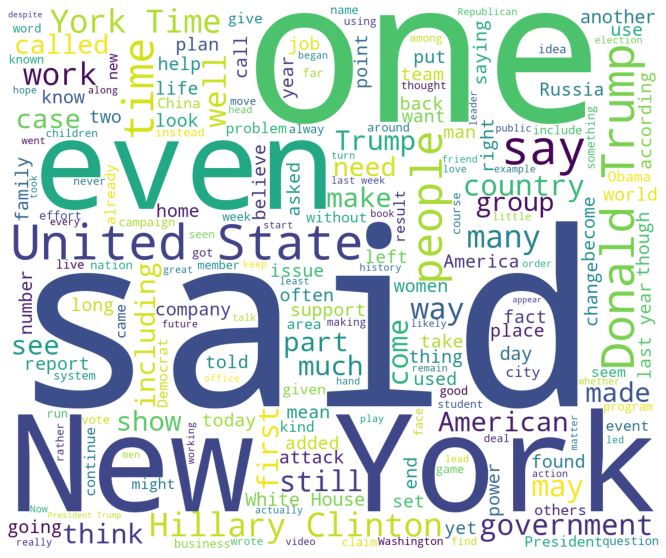

In [ ]:
wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(cleanwords))

plt.subplots(figsize=(15,10))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [ ]:
# Bigrams should be more interesting

bigrams = nltk.bigrams(cleanwords)


In [ ]:
# look at the most common. 

from collections import Counter

counter = Counter(bigrams)
print(counter.most_common(10))

[(('New', 'York'), 18213), (('United', 'States'), 14438), (('Donald', 'Trump'), 11965), (('York', 'Times'), 10818), (('The', 'New'), 10376), (('Hillary', 'Clinton'), 9968), (('White', 'House'), 6782), (('last', 'year'), 3855), (('said', 'The'), 3197), (('President', 'Trump'), 2991)]


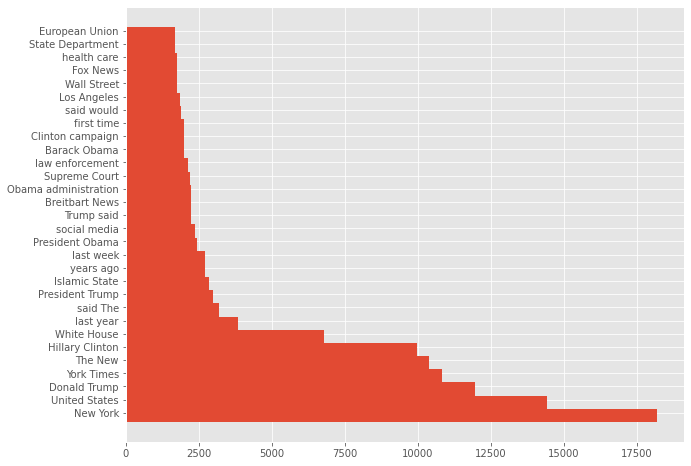

In [ ]:
num_to_show = 30

labels = [" ".join(e[0]) for e in counter.most_common(num_to_show)]
values = [e[1] for e in counter.most_common(num_to_show)]

indexes = np.arange(len(labels))
width = 1

#plt.bar(indexes, values, width)
#plt.xticks(indexes + width * 0.5, labels, rotation=90)
plt.subplots(figsize=(10, 8))
plt.barh(indexes, values, width)
plt.yticks(indexes + width * 0.2, labels)
plt.show()